<a href="https://colab.research.google.com/github/Lucas-O-S/N2-2B_AnaliseDados/blob/Analise-Estatistica/analiseestudantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a rel="license" href="https://faculdadesalvadorarena.org.br/"><img alt="FESA" style="border-width:0" src="https://faculdadesalvadorarena.org.br/wp-content/uploads/2022/07/logo_fesa.png" /></a><br />
**FESA - Eletiva II (2025.1)** <br/>

Aluno(a): Adriana Kaori Kakazu - RA: 082220004 <br/>
Aluno(a): Lucas Oliveira Silva - RA: 082220019 <br/>
Aluno(a): Vitoria Kaori Kuriyama - RA: 082220005 <br/>
Data: 07/06/2025 <br/>

#1: Preprarando Dataset

##1.1: Importações


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
UrlDataset = "https://raw.githubusercontent.com/Lucas-O-S/N2-2B_AnaliseDados/refs/heads/main/dataset/student_habits_performance.csv"

dataset = pd.read_csv(UrlDataset, sep=",")

#2: Análise Exploratória de Dados (EDA)

##2.1: Verificação dos dados

Objetivo tratar a base de dados: verificar a presença de dados ausentes (missing values), valores duplicados ou inconsistências nos dados antes de iniciar as análises

### 2.1.1: Dados ausentes

In [23]:
print(dataset.isnull().sum())

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64


Remover linhas com dados ausentes

In [24]:
dataset = dataset.dropna()

Verificar se foram removidas

In [25]:
print(dataset.isnull().sum())

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64


### 2.1.2: Dados duplicados

In [26]:
print(f'Duplicatas: {dataset.duplicated().sum()} linhas')

Duplicatas: 0 linhas


Temos 0 linhas duplicatas, entretanto se existissem utilizariamos os eguinte comando

In [27]:
dataset = dataset.drop_duplicates()

### 2.1.3: inconsistências nos dados

Verificar os valores das colunas

In [28]:
for col in dataset.select_dtypes(include=['object', 'category']).columns:
    print(f"\nColuna: {col}")
    print(dataset[col].unique())


Coluna: student_id
['S1000' 'S1001' 'S1002' 'S1003' 'S1004' 'S1005' 'S1006' 'S1007' 'S1008'
 'S1009' 'S1011' 'S1012' 'S1013' 'S1014' 'S1015' 'S1016' 'S1017' 'S1018'
 'S1019' 'S1020' 'S1021' 'S1022' 'S1023' 'S1024' 'S1025' 'S1026' 'S1027'
 'S1028' 'S1029' 'S1030' 'S1031' 'S1032' 'S1034' 'S1035' 'S1036' 'S1037'
 'S1038' 'S1039' 'S1040' 'S1041' 'S1042' 'S1043' 'S1044' 'S1045' 'S1046'
 'S1048' 'S1049' 'S1050' 'S1051' 'S1052' 'S1053' 'S1054' 'S1055' 'S1056'
 'S1057' 'S1058' 'S1059' 'S1060' 'S1061' 'S1062' 'S1063' 'S1064' 'S1065'
 'S1066' 'S1067' 'S1068' 'S1069' 'S1070' 'S1071' 'S1072' 'S1073' 'S1075'
 'S1076' 'S1077' 'S1078' 'S1079' 'S1080' 'S1081' 'S1082' 'S1083' 'S1084'
 'S1085' 'S1086' 'S1087' 'S1088' 'S1089' 'S1090' 'S1091' 'S1092' 'S1094'
 'S1095' 'S1096' 'S1097' 'S1098' 'S1099' 'S1101' 'S1103' 'S1104' 'S1105'
 'S1106' 'S1108' 'S1109' 'S1110' 'S1111' 'S1112' 'S1113' 'S1114' 'S1118'
 'S1119' 'S1120' 'S1121' 'S1122' 'S1123' 'S1124' 'S1125' 'S1126' 'S1127'
 'S1128' 'S1129' 'S1130' 'S1131

Nas colunas categóricas, foram observadas possíveis inconsistências de capitalização (maiúsculas/minúsculas), como:

Gender: valores como "male" e "Male"

Exercise: "yes", "Yes", "No", "no"
etc.

Vamos verificar o nome das colunas


In [29]:
print(dataset.columns.tolist())

['student_id', 'age', 'gender', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'part_time_job', 'attendance_percentage', 'sleep_hours', 'diet_quality', 'exercise_frequency', 'parental_education_level', 'internet_quality', 'mental_health_rating', 'extracurricular_participation', 'exam_score']


Corrigir nomes de colunas: remover espaços extras, o que não tem, mas caso tenha, é um passo importante

In [30]:
dataset.columns = dataset.columns.str.strip()

Lista de colunas a serem corrigidas

In [31]:
categorical_columns = [
    'gender',
    'diet_quality',
    'exercise_frequency',
    'parental_education_level',
    'extracurricular_participation'
]

Identificar automaticamente colunas categóricas (do tipo object ou category)

In [32]:
categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns

Padronizar os valores: capitalização e remoção de espaços extras nos dados

In [33]:
for col in categorical_columns:
    dataset.loc[:, col] = dataset[col].astype(str).str.strip().str.capitalize()

Verificar se ainda existem valores unicos/repetidos que podem indicar inconsistencias


In [34]:
for col in dataset.select_dtypes(include=['object', 'category']).columns:
    print(f"\nColuna: {col}")
    print(dataset[col].unique())


Coluna: student_id
['S1000' 'S1001' 'S1002' 'S1003' 'S1004' 'S1005' 'S1006' 'S1007' 'S1008'
 'S1009' 'S1011' 'S1012' 'S1013' 'S1014' 'S1015' 'S1016' 'S1017' 'S1018'
 'S1019' 'S1020' 'S1021' 'S1022' 'S1023' 'S1024' 'S1025' 'S1026' 'S1027'
 'S1028' 'S1029' 'S1030' 'S1031' 'S1032' 'S1034' 'S1035' 'S1036' 'S1037'
 'S1038' 'S1039' 'S1040' 'S1041' 'S1042' 'S1043' 'S1044' 'S1045' 'S1046'
 'S1048' 'S1049' 'S1050' 'S1051' 'S1052' 'S1053' 'S1054' 'S1055' 'S1056'
 'S1057' 'S1058' 'S1059' 'S1060' 'S1061' 'S1062' 'S1063' 'S1064' 'S1065'
 'S1066' 'S1067' 'S1068' 'S1069' 'S1070' 'S1071' 'S1072' 'S1073' 'S1075'
 'S1076' 'S1077' 'S1078' 'S1079' 'S1080' 'S1081' 'S1082' 'S1083' 'S1084'
 'S1085' 'S1086' 'S1087' 'S1088' 'S1089' 'S1090' 'S1091' 'S1092' 'S1094'
 'S1095' 'S1096' 'S1097' 'S1098' 'S1099' 'S1101' 'S1103' 'S1104' 'S1105'
 'S1106' 'S1108' 'S1109' 'S1110' 'S1111' 'S1112' 'S1113' 'S1114' 'S1118'
 'S1119' 'S1120' 'S1121' 'S1122' 'S1123' 'S1124' 'S1125' 'S1126' 'S1127'
 'S1128' 'S1129' 'S1130' 'S1131

##2.2: Estatísticas Descritivas

### 2.2.1: Descrevendo dataset

É possivel observar a quantidade, a media, desvio padrão, valor minimo, quartis e valor maximo de cada coluna


In [35]:
dataset.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,20.475248,3.538724,2.504620,1.830363,83.880308,6.474037,3.051705,5.466447,69.558196
std,2.302721,1.469730,1.164802,1.071251,9.453622,1.218943,2.035632,2.857525,16.929436
min,17.000000,0.000000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.000000,2.500000,1.700000,1.000000,77.500000,5.600000,1.000000,3.000000,58.400000
50%,20.000000,3.500000,2.500000,1.800000,84.200000,6.500000,3.000000,5.000000,70.400000
75%,22.000000,4.500000,3.300000,2.600000,90.700000,7.300000,5.000000,8.000000,81.300000
max,24.000000,8.300000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


###2.2.2: Frequencia de Valores Unicos

In [40]:
dataset.select_dtypes(include='object').nunique()

,0
student_id,909
gender,3
part_time_job,2
diet_quality,3
parental_education_level,3
internet_quality,3
extracurricular_participation,2


### 2.2.3: Valores Fora do Padrão

In [51]:
Q1 = dataset['exam_score'].quantile(0.25)
Q3 = dataset['exam_score'].quantile(0.75)
IQR = Q3 - Q1

outliers = dataset[(dataset['exam_score'] < Q1 - 1.5 * IQR) | (dataset['exam_score'] > Q3 + 1.5 * IQR)]
print(f"Número de outliers em 'exam_score': {len(outliers)}")

Número de outliers em 'exam_score': 2


Dentre as notas dos alunos a dois registros que se encontram fora do padrão

##2.3: Visualizações Graficas

In [37]:
##Construa visualizações gráficas para melhor interpretar os dados

#3: Perguntas

## 3.1: Existe diferença entre meninos e meninas na participação em atividades extracurriculares?

In [43]:
pd.crosstab(dataset['gender'], dataset['extracurricular_participation'], normalize='index') * 100

extracurricular_participation,No,Yes
gender,,
Female,67.898383,32.101617
Male,68.863636,31.136364
Other,63.888889,36.111111


A participação em atividades extracurriculares é semelhante entre os gêneros, com variação de poucos pontos percentuais.
Ela é baixa para todos os grupos, ou seja, não há uma diferença significativa entre meninas (32,1%) e meninos (31,1%) e o grupo "Other" foi quem apresentou a maior taxa de participação (36,1%).

## 3.2: Qual a relação entre o nível de escolaridade dos pais e a qualidade da dieta dos filhos?

In [44]:
pd.crosstab(dataset['parental_education_level'], dataset['diet_quality'], normalize='index') * 100

diet_quality,Fair,Good,Poor
parental_education_level,,,
Bachelor,44.857143,37.142857,18.000000
High school,42.602041,39.795918,17.602041
Master,43.113772,36.526946,20.359281


Não há uma relação linear clara entre maior escolaridade dos pais e melhor dieta dos estudantes. Já que em todos os níveis de escolaridade, a maior parte dos estudantes tem uma dieta "Fair"(razoável).
Na verdade, os dados sugerem que pais com ensino médio podem estar associados a hábitos alimentares ligeiramente melhores nos filhos.

## 3.3: Correlação entre horas de estudo e Notas

In [53]:
correlacao = dataset['exam_score'].corr(dataset['study_hours_per_day'])
print(f"Correlação entre notas e horas de estudo: {correlacao:.2f}")

Correlação entre notas e horas de estudo: 0.82


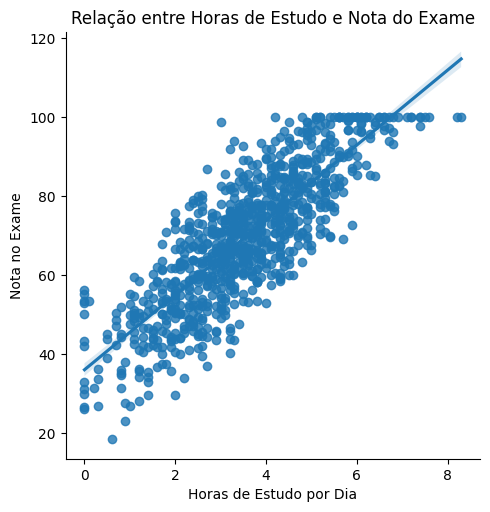

In [54]:

sns.lmplot(x='study_hours_per_day', y='exam_score', data=dataset)
plt.title('Relação entre Horas de Estudo e Nota do Exame')
plt.xlabel('Horas de Estudo por Dia')
plt.ylabel('Nota no Exame')
plt.show()

## 3.4:

## 3.5:

## 3.6: